# Data Analysis

In [1]:
import pandas as pd
from collections import defaultdict, Counter
import json
import matplotlib.pyplot as plt
import numpy as np

funding = pd.read_csv('clean_data.csv')
funding

,region,coordinates,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,funding_type,series,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid
0,"Amsterdam, Noord-Holland, The Netherlands","(52.36999, 4.8919)",By Rocket Box,By Rocket Box is a startup that creates Welcom...,Coming Soon,[],[],rocket-box-group,2018-10-28,private_equity,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,007229b41a197ce1f42bc0e481a85861
1,"Ghent, Oost-Vlaanderen, Belgium","(51.05, 3.71667)",Wetime,Wetime is a social platform that engages coupl...,Wetime is the bridge builder for couples and f...,"['Social Network', 'Dating', 'B2C', 'Communiti...","['Internet Services', 'Community and Lifestyle...",wetime,2018-10-20,seed,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,ebe752d1cc32497faf208f52e82a208d
2,"Nairobi, Nairobi Area, Kenya","(-1.28333, 36.81667)",ImpalaCoin,We are Building a trade finance Crypto bank o...,Digital Currency Kenya,[],[],impalacoin,2018-10-20,initial_coin_offering,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,c9994563a56e4b9fb3204f1a0b5db7c3
3,"Boston, Massachusetts, United States","(42.35843, -71.05977)",MTonomy,Future of digital media: \n\n- Scalable decent...,"Blockchain infrastructure to license, distribu...","['Blockchain', 'Media and Entertainment', 'Int...","['Media and Entertainment', 'Internet Services']",mtonomy,2018-10-20,undisclosed,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,7d89c23af1a04235870605141a0d751e
4,"Philadelphia, Pennsylvania, United States","(39.95233, -75.16379)",Simply Good Jars,NaN,Eat well | Feel Good | Waste Less,['Organic Food'],['Food and Beverage'],simply-good-jars,2018-10-20,pre_seed,NaN,350000.0,2,Investor's Circle,Organization,angel_group,"Investors' Circle is the oldest, largest and m...","Investors' Circle is the oldest, largest and m...",19e3767d62d34c6487c72901dfcb2780
5,"Denver, Colorado, United States","(39.73915, -104.9847)",Sustain,NaN,Sustain rewards and incentivize employees to c...,[],[],sustain-2,2018-10-18,pre_seed,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1db16dc217ea481d9d6101f32fa49660
6,"Tokyo, Tokyo, Japan","(35.6895, 139.69171)",Meltin MMI,Meltin MMI is a cyborg-technology company that...,Meltin MMI is a cyborg-technology company that...,"['Robotics', 'Health Care', 'Biotechnology']","['Hardware', 'Science and Engineering', 'Softw...",meltin-mmi,2018-10-17,venture,B,17974941.0,3,Dainippon Sumitomo Pharma,Organization,NaN,"""Green Prism"", the symbol of Dainippon Sumitom...",Dainippon Sumitomo Pharma is a pharmaceutical ...,f0877e36d40c4d628c35c6769cec12e3
7,"Tel Aviv, Tel Aviv, Israel","(32.08088, 34.78057)",Cognata,The fast lane to Autonomous Driving.\n\nAutono...,Cognata provides driving validation platform f...,"['Autonomous Vehicles', 'Automotive', 'Software']","['Transportation', 'Transportation', 'Software']",cognata,2018-10-17,venture,B,18500000.0,5,Scale Venture Partners,Organization,venture_capital,Scale Venture Partners invests in software com...,Scale Venture Partners is a VC firm funding th...,ee565296d58944eaaf23c7342100041b
8,"Jakarta, Jakarta Raya, Indonesia","(-6.21462, 106.84513)",Crowde,Crowde is a crowd-investing platform that enab...,Crowde is a crowd-investing platform that enab...,"['AgTech', 'Social Entrepreneurship', 'Crowdfu...","['Agriculture and Farming', 'Community and Lif...",crowde,2018-10-17,seed,NaN,NaN,2,GREE Ventures,Organization,venture_capital,GREE Ventures focuses on investing in early st...,GREE Ventures invests in early stage (Seed to ...,e8c430e2b8d7453c9f2708d27b4efcab
9,"New York, New York, United States","(40.71427, -74.00597)",WhiteSource,WhiteSource becomes part of your software deve...,WhiteSource empowers businesses to develop bet...,"['Open Source', 'Developer Tools', 'Enterprise...","['Software', 'Software', 'Software']",white-source,2018-10-17,venture,C,35000000.0,3,Susquehanna Growth Equity,Organization,private_equity_firm,"Susqueh

In [3]:
CATEGORY_CONVERSIONS = {
    '"Women\'s"': 'Women\'s',
    '"Men\'s"': 'Men\'s',
}

def clean_category_list(string):
    categories = []
    clean = string.lstrip('[').rstrip(']').split(', ')
    for i in clean:
        if i == '':
            continue
        if i in CATEGORY_CONVERSIONS:
            i = CATEGORY_CONVERSIONS[i]
        categories.append(i.strip('\''))
    return categories

def get_category_counts(df):
    rows = df['fundedorg_categories']
    counts = defaultdict(int)
    for _, row in df.iterrows():
        if "United States" not in row['region']:
            continue
        categories = clean_category_list(row['fundedorg_categories'])
        for c in categories:
            counts[c] += 1
    
    #return counts
    # Eliminate all categories that don't have at least 50 companies
    # in them from our dataset.
    return counts#dict((k, v) for k, v in counts.iteritems() if v >= 50)

def get_categories(df):
    counts = get_category_counts(df)
    return counts.keys()

In [4]:
categories = get_categories(funding)

In [5]:
counts = get_category_counts(funding)

In [6]:
def none_in_dictionary(l, d):
    missing = 0
    for item in l:
        if item not in d:
            missing += 1
    return missing == len(l)

cities = defaultdict(int)
for _, row in funding.iterrows():
    city = row['region']
    if "United States" not in city:
        continue
    categories = clean_category_list(row['fundedorg_categories'])
    if none_in_dictionary(categories, counts):
        continue
    cities[city] += 1
    
cities = dict((k, v) for k, v in cities.iteritems() if v >= 20)

total_companies = sum(cities.values())

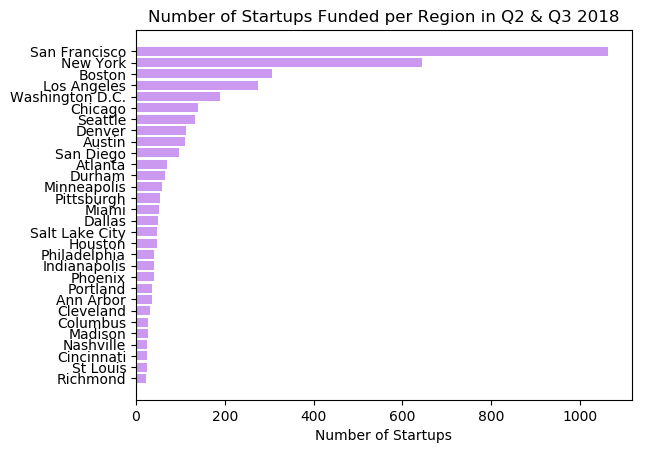

In [7]:
def plot_cities(cities):
    plt.rcdefaults()
    _, ax = plt.subplots()
    y_labels = [city.split(",")[0] if "District of Columbia" not in city else "Washington D.C." for city, _ in cities[0:30]]
    y_pos = np.arange(len(y_labels))
    x_values = [count for  _, count in cities[0:30]]
    
    ax.barh(y_pos, x_values, align='center', color='#cb99f0', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.title('Number of Startups Funded per Region in Q2 & Q3 2018')
    plt.xlabel('Number of Startups')
    plt.show()

type(Counter(cities).most_common())
plot_cities(Counter(cities).most_common())

In [12]:
city_lists = defaultdict(list)
for c, _ in counts.iteritems():
    df = funding.loc[funding['fundedorg_categories'].str.contains(c, regex=False)]
    for _, row in df.iterrows():
        categories = clean_category_list(row['fundedorg_categories'])
        if c not in categories:
            continue
        city = row['region']
        if city not in cities:
            continue
        city_lists[city].append(c)
            
category_ratios = defaultdict(lambda: defaultdict(float))
for city, _ in city_lists.iteritems():
    for category, count in Counter(city_lists[city]).most_common():
        exceptions = ["Pittsburg, Pennsylvania, United States", "Cleveland, Ohio, United States", "Miami, Florida, United States", "Salt Lake City, Utah, United States", "Indianapolis, Indiana, United States", "Phoenix, Arizona, United States", "Portland, Oregon, United States", "Ann Arbor, Michigan, United States"]
        if float(count) < 5:
            continue
        percent_in_city = float(count) / cities[city]
        total_percent = float(counts[category]) / total_companies
        category_ratios[city][category] = percent_in_city / total_percent

In [13]:
json_list = []
for city, category_ratio in category_ratios.iteritems():
    if "United States" not in city:
        continue
    max_ratios = Counter(category_ratios[city]).most_common()[0:5]
    top_categories = [i[0] for i in max_ratios]
    print city, top_categories

Ann Arbor, Michigan, United States ['Biotechnology', 'Health Care']
Philadelphia, Pennsylvania, United States ['Health Care', 'Biotechnology']
Dallas, Texas, United States ['SaaS', 'Financial Services', 'Health Care', 'Software']
Minneapolis, Minnesota, United States ['Medical Device', 'Health Care', 'Medical', 'Biotechnology', 'Information Technology']
Seattle, Washington, United States ['Service Industry', 'Cloud Computing', 'Computer', 'E-Commerce', 'Internet']
St Louis, Missouri, United States ['Biotechnology', 'Health Care']
Nashville, Tennessee, United States ['Medical', 'Health Care']
New York, New York, United States ['News', 'Grocery', 'Property Management', 'Subscription Service', 'Wine And Spirits']
Los Angeles, California, United States ['eSports', 'Smart Building', 'Subscription Service', 'Gaming', 'Digital Entertainment']
San Francisco, California, United States ['File Sharing', 'PaaS', 'Crowdsourcing', 'Photo Sharing', 'Computer Vision']
Cleveland, Ohio, United States ['

In [26]:
Counter(city_lists["Charleston, South Carolina, United States"]).most_common()

[]

In [196]:
json_string = [
    {
        "city": "New York, New York",
        "icon": "images/real_estate.png",
        "categories": "Fashion, Real Estate, and Risk Management"
    }, {
        "city": "San Diego, California",
        "icon": "images/therapeutics.png",
        "categories": "Therapeutics, Biotechnology, and Health Care"
    }, {
        "city": "Denver, Colorado",
        "icon": "images/it.png",
        "categories": "Information Technology and Healthcare"
    }, {
        "city": "Philadelphia, Pennsylvania",
        "icon": "images/healthcare.png",
        "categories": "Health Care"
    }, {
        "city": "Atlanta, Georgia",
        "icon": "images/healthcare.png",
        "categories": "Health Care"
    }, {
        "city": "Minneapolis, Minnesota",
        "icon": "images/medical_accessories.png",
        "categories": "Medical Accessories, Health Care, and Biotechnology"
    }, {
        "city": "San Francisco, California",
        "icon": "images/autonomous_vehicles.png",
        "categories": "Autonomous Vehicles, Cloud Technologies, and Virtual Reality"
    }, {
        "city": "Boston, Massachusetts",
        "icon": "images/therapeutics.png",
        "categories": "Therapeutics, Medical Accessories, and Biotechnology"
    }, {
        "city": "Chicago, Illinois",
        "icon": "images/enterprise.png",
        "categories": "Enterprise Software, Information Technology, and Financial Services"
    }, {
        "city": "Seattle, Washington",
        "icon": "images/ecommerce.png",
        "categories": "E-Commerce, Machine Learning, and Enterprise Software"
    }, {
        "city": "Austin, Texas",
        "icon": "images/machine_learning.png",
        "categories": "Artificial Intelligence and Information Technology"
    }, {
        "city": "Los Angeles, California",
        "icon": "images/entertainment.png",
        "categories": "Media and Entertainment, Digital Media, and Mobile"
    }, {
        "city": "Houston, Texas",
        "icon": "images/healthcare.svg",
        "categories": "Health Care"
    }, {
        "city": "Washington, D.C.",
        "icon": "images/security.png",
        "categories": "Cyber Security"
    }, {
        "city": "Nashville, Tennessee",
        "icon": "images/healthcare.svg",
        "categories": "Health Care"
    }, {
        "city": "Durham, North Carolina",
        "icon": "images/biotechnology.svg",
        "categories": "Biotechnology and Health Care"
    }]
    
json_string

[{'categories': 'Fashion, Real Estate, and Risk Management',
  'city': 'New York, New York',
  'icon': 'images/real_estate.png'},
 {'categories': 'Therapeutics, Biotechnology, and Health Care',
  'city': 'San Diego, California',
  'icon': 'images/therapeutics.png'},
 {'categories': 'Information Technology and Healthcare',
  'city': 'Denver, Colorado',
  'icon': 'images/it.png'},
 {'categories': 'Health Care',
  'city': 'Philadelphia, Pennsylvania',
  'icon': 'images/healthcare.png'},
 {'categories': 'Health Care',
  'city': 'Atlanta, Georgia',
  'icon': 'images/healthcare.png'},
 {'categories': 'Medical Accessories, Health Care, and Biotechnology',
  'city': 'Minneapolis, Minnesota',
  'icon': 'images/medical_accessories.png'},
 {'categories': 'Autonomous Vehicles, Cloud Technologies, and Virtual Reality',
  'city': 'San Francisco, California',
  'icon': 'images/autonomous_vehicles.png'},
 {'categories': 'Therapeutics, Medical Accessories, and Biotechnology',
  'city': 'Boston, Massach

In [207]:
import cgi
from geopy import geocoders
import random
import sys

keys = ['sperigo1', 'sperigo2', 'sperigo3', 'sperigo4', 'sperigo5']

def get_coordinates(city_name):
    while True:
        try:
            location = geocoders.GeoNames(username=random.choice(keys)).geocode(city_name)
            if location == None:
                continue
            return [location.longitude, location.latitude]
        except:
            print sys.exc_info()
            continue

def generate_description(json_entry):
    city = json_entry["city"].split(",")[0]
    templates = ["[X] is home to a disproportionate amount of [Y] start-ups.", "[X] is home to a lot of [Y] start-ups.", "You'll find lots of [Y] start-ups in [X].", "[Y] start-ups are very common in [X].", "[X] is a leader in the [Y] industry."]
    description = random.choice(templates).replace("[X]", city).replace("[Y]", json_entry["categories"])
    return "<strong>%s</strong><p>%s</p>" % (city, description)
    
def generate_geo_json(json_string):
    geo_json = []
    for j in json_string:
        entry = {
            "type": "Feature",
            "geometry": {
              "type": "Point",
              "coordinates": get_coordinates(j["city"])
            },
            "properties": {
              "description": generate_description(j),
              "icon": {
                "iconUrl": j["icon"],
                "iconSize": [30, 30], # size of the icon
                "iconAnchor": [15, 15], # point of the icon which will correspond to marker's location
                "popupAnchor": [0, -15], # point from which the popup should open relative to the iconAnchor
                "className": "dot"
              }
            }
        }
        geo_json.append(entry)
    return geo_json

geo_json = generate_geo_json(json_string)
print geo_json

[{'geometry': {'type': 'Point', 'coordinates': [-74.00597, 40.71427]}, 'type': 'Feature', 'properties': {'description': "<strong>New York</strong><p>You'll find lots of Fashion, Real Estate, and Risk Management start-ups in New York.</p>", 'icon': {'iconSize': [30, 30], 'iconUrl': 'images/real_estate.png', 'iconAnchor': [15, 15], 'className': 'dot', 'popupAnchor': [0, -15]}}}, {'geometry': {'type': 'Point', 'coordinates': [-117.16472, 32.71571]}, 'type': 'Feature', 'properties': {'description': '<strong>San Diego</strong><p>San Diego is home to a disproportionate amount of Therapeutics, Biotechnology, and Health Care start-ups.</p>', 'icon': {'iconSize': [30, 30], 'iconUrl': 'images/therapeutics.png', 'iconAnchor': [15, 15], 'className': 'dot', 'popupAnchor': [0, -15]}}}, {'geometry': {'type': 'Point', 'coordinates': [-104.9847, 39.73915]}, 'type': 'Feature', 'properties': {'description': '<strong>Denver</strong><p>Information Technology and Healthcare start-ups are very common in Denv